In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
import plotly as py
import cufflinks as cf

In [14]:
from plotly.offline import iplot

In [15]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [16]:
world_cups=pd.read_csv('WorldCups.csv')
players=pd.read_csv('WorldCupPlayers.csv')
matches=pd.read_csv('WorldCupMatches.csv')

In [17]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [18]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [19]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [20]:
matches.dropna(subset=['Year'],inplace=True)

In [21]:
matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [22]:
matches['Home Team Name'].value_counts()

Brazil                        82
Italy                         57
Argentina                     54
Germany FR                    43
England                       35
                              ..
IR Iran                        1
rn">Bosnia and Herzegovina     1
Bolivia                        1
Angola                         1
rn">United Arab Emirates       1
Name: Home Team Name, Length: 78, dtype: int64

In [23]:
matches['Home Team Name'].str.contains('rn">')

0      False
1      False
2      False
3      False
4      False
       ...  
847    False
848    False
849    False
850    False
851    False
Name: Home Team Name, Length: 852, dtype: bool

In [24]:
matches[matches['Home Team Name'].str.contains('rn">')]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
414,1990.0,09 Jun 1990 - 17:00,Group D,Renato Dall Ara,Bologna,"rn"">United Arab Emirates",0.0,2.0,Colombia,,30791.0,0.0,0.0,COURTNEY George (ENG),TAKADA Shizuo (JPN),SNODDY Alan (NIR),322.0,119.0,UAE,COL
433,1990.0,17 Jun 1990 - 17:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",0.0,0.0,Egypt,,33288.0,0.0,0.0,VAN LANGENHOVE Marcel (BEL),QUINIOU Joel (FRA),LO BELLO Rosario (ITA),322.0,152.0,IRL,EGY
446,1990.0,21 Jun 1990 - 21:00,Group F,Della Favorita,Palermo,"rn"">Republic of Ireland",1.0,1.0,Netherlands,,33288.0,0.0,1.0,VAUTROT Michel (FRA),LORENC Richard (AUS),HANSAL Mohamed (ALG),322.0,228.0,IRL,NED
452,1990.0,25 Jun 1990 - 17:00,Round of 16,Luigi Ferraris,Genoa,"rn"">Republic of Ireland",0.0,0.0,Romania,Republic of Ireland win on penalties (5 - 4),31818.0,0.0,0.0,RAMIZ WRIGHT Jose (BRA),MACIEL Carlos (PAR),MANDI Jassim (BHR),323.0,248.0,IRL,ROU
492,1994.0,28 Jun 1994 - 12:30,Group E,Giants Stadium,New York/New Jersey,"rn"">Republic of Ireland",0.0,0.0,Norway,,72404.0,0.0,0.0,TORRES CADENA Jose Joaquin (COL),ALVES Paulo Jorge (BRA),PARK Hae-Yong (KOR),337.0,3077.0,IRL,NOR
582,2002.0,01 Jun 2002 - 15:30,Group E,Niigata Stadium Big Swan,Niigata,"rn"">Republic of Ireland",1.0,1.0,Cameroon,,33679.0,0.0,1.0,KAMIKAWA Toru (JPN),AWANG HAMAT Mat Lazim (MAS),VAN NYLEN Roland (BEL),43950100.0,43950002.0,IRL,CMR
647,2006.0,10 Jun 2006 - 18:00,Group B,"FIFA World Cup Stadium, Dortmund",Dortmund,"rn"">Trinidad and Tobago",0.0,0.0,Sweden,,62959.0,0.0,0.0,MAIDIN Shamsul (SIN),PERMPANICH Prachya (THA),GHULOUM Eisa (UAE),97410100.0,97410004.0,TRI,SWE
649,2006.0,11 Jun 2006 - 15:00,Group C,Zentralstadion,Leipzig,"rn"">Serbia and Montenegro",0.0,1.0,Netherlands,,43000.0,0.0,1.0,MERK Markus (GER),SCHRAER Christian (GER),SALVER Jan-Hendrik (GER),97410100.0,97410006.0,SCG,NED
813,2014.0,25 Jun 2014 - 13:00,Group F,Arena Fonte Nova,Salvador,"rn"">Bosnia and Herzegovina",3.0,1.0,IR Iran,,48011.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931.0,300186464.0,BIH,IRN


In [25]:
names=matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()

In [26]:
names.index

Index(['rn">Republic of Ireland', 'rn">United Arab Emirates',
       'rn">Serbia and Montenegro', 'rn">Bosnia and Herzegovina',
       'rn">Trinidad and Tobago'],
      dtype='object')

In [27]:
wrong=list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">Trinidad and Tobago']

In [28]:
correct=[name.split('>')[1]for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina',
 'Trinidad and Tobago']

# most number of world cup winning title

In [29]:
winner=world_cups['Winner'].value_counts()

In [30]:
winner

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Germany       1
Spain         1
Name: Winner, dtype: int64

In [33]:
winner.iplot(kind='bar',xTitle='World cup winner',yTitle='No.Of Matches',color="black")

In [34]:
runnerup=world_cups['Runners-Up'].value_counts()

In [35]:
third=world_cups['Third'].value_counts()

In [36]:
teams=pd.concat([winner,runnerup,third],axis=1)
teams

,Winner,Runners-Up,Third
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Germany,1.0,1.0,3.0
Spain,1.0,NaN,NaN
Netherlands,NaN,3.0,1.0


In [37]:
teams.fillna(0,inplace=True)
teams=teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany FR,3,3,1
Uruguay,2,0,0
Argentina,2,3,0
England,1,0,0
France,1,1,2
Germany,1,1,3
Spain,1,0,0
Netherlands,0,3,1


In [38]:
teams.iplot(kind='bar',xTitle='Teams',yTitle='count',title='Fifa world cup winning count')

# number of goal per country

In [39]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [40]:
home=matches[['Home Team Name','Home Team Goals']].dropna()
away=matches[['Away Team Name','Away Team Goals']].dropna()

In [41]:
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [42]:
home.columns=['Countries','Goals']
away.columns=home.columns

In [43]:
away

,Countries,Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0
...,...,...
847,Costa Rica,0.0
848,Germany,7.0
849,Argentina,0.0
850,Netherlands,3.0


In [44]:
goals=home.append(away,ignore_index=True)

In [45]:
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [46]:
goals=goals.groupby('Countries').sum()

In [47]:
goals

,Goals
Countries,
Algeria,14.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
"rn"">Bosnia and Herzegovina",4.0
"rn"">Republic of Ireland",10.0
"rn"">Serbia and Montenegro",2.0


In [48]:
goals=goals.sort_values(by='Goals',ascending=False)

In [49]:
goals

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
...,...
Dutch East Indies,0.0
China PR,0.0
Canada,0.0


In [50]:
goals[:20].iplot(kind='bar',xTitle='Country Name',yTitle='No of goals')


# Attendance ,Number of teams,goals and matches per cup

In [51]:
world_cups['Attendance']=world_cups['Attendance'].str.replace(".","")

<ipython-input-51-3641d4b10633>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [52]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


In [53]:
attendance=world_cups[['Year','Attendance']]

In [54]:
attendance

,Year,Attendance
0,1930,590549
1,1934,363000
2,1938,375700
3,1950,1045246
4,1954,768607
5,1958,819810
6,1962,893172
7,1966,1563135
8,1970,1603975
9,1974,1865753


In [55]:
attendance.iplot(kind='bar')

In [56]:
attendance1=world_cups[['Year','Attendance']]

In [57]:
attendance1

,Year,Attendance
0,1930,590549
1,1934,363000
2,1938,375700
3,1950,1045246
4,1954,768607
5,1958,819810
6,1962,893172
7,1966,1563135
8,1970,1603975
9,1974,1865753


In [58]:
attendance1=attendance1.set_index('Year')

In [59]:
attendance1=attendance1.astype('int')

<AxesSubplot:xlabel='Year'>

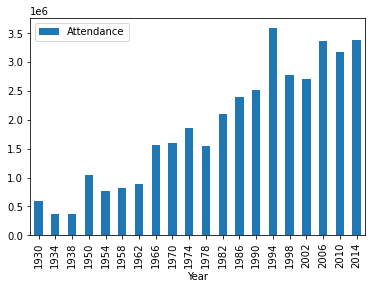

In [60]:
attendance1.plot.bar()

In [61]:
attendance1.iplot(kind='bar')

# goals per team per world cup

In [62]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [63]:
home=matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()

In [64]:
away=matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()

In [82]:
goals=pd.concat([home,away],axis=1)
goals

Home Team Goals  Away Team Goals
Year                                                               
1930.0 Argentina                              16.0              2.0
       Belgium                                 NaN              0.0
       Bolivia                                 NaN              0.0
       Brazil                                  4.0              1.0
       Chile                                   4.0              1.0
...                                            ...              ...
2014.0 Spain                                   1.0              3.0
       Switzerland                             4.0              3.0
       USA                                     2.0              4.0
       Uruguay                                 3.0              1.0
       rn">Bosnia and Herzegovina              3.0              1.0

[427 rows x 2 columns]

In [83]:
goals.fillna(0,inplace=True)

In [84]:
goals['Goals']=goals['Home Team Goals']+goals['Away Team Goals']

In [85]:
goals=goals.drop(labels=['Home Team Goals','Away Team Goals'],axis=1)

In [86]:
goals=goals.reset_index()

In [87]:
goals.columns=['Year','Country','Goals']

In [88]:
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
1,1930.0,Belgium,0.0
2,1930.0,Bolivia,0.0
3,1930.0,Brazil,5.0
4,1930.0,Chile,5.0
...,...,...,...
422,2014.0,Spain,4.0
423,2014.0,Switzerland,7.0
424,2014.0,USA,6.0
425,2014.0,Uruguay,4.0


In [89]:
goals=goals.sort_values(by=['Year','Goals'],ascending=[True,False])

In [93]:
top5=goals.groupby('Year').head(5)

In [94]:
import plotly.graph_objects as go

In [95]:
x,y=goals['Year'].values,goals['Goals'].values

In [96]:
x,y

(array([1930., 1930., 1930., 1930., 1930., 1930., 1930., 1930., 1930.,
        1930., 1930., 1930., 1930., 1934., 1934., 1934., 1934., 1934.,
        1934., 1934., 1934., 1934., 1934., 1934., 1934., 1934., 1934.,
        1934., 1934., 1938., 1938., 1938., 1938., 1938., 1938., 1938.,
        1938., 1938., 1938., 1938., 1938., 1938., 1938., 1938., 1950.,
        1950., 1950., 1950., 1950., 1950., 1950., 1950., 1950., 1950.,
        1950., 1950., 1950., 1954., 1954., 1954., 1954., 1954., 1954.,
        1954., 1954., 1954., 1954., 1954., 1954., 1954., 1954., 1954.,
        1954., 1958., 1958., 1958., 1958., 1958., 1958., 1958., 1958.,
        1958., 1958., 1958., 1958., 1958., 1958., 1958., 1958., 1962.,
        1962., 1962., 1962., 1962., 1962., 1962., 1962., 1962., 1962.,
        1962., 1962., 1962., 1962., 1962., 1962., 1966., 1966., 1966.,
        1966., 1966., 1966., 1966., 1966., 1966., 1966., 1966., 1966.,
        1966., 1966., 1966., 1966., 1970., 1970., 1970., 1970., 1970.,
      

In [97]:
data=[]

In [98]:
for team in top5['Country'].drop_duplicates().values:
    year=top5[top5['Country']==team]['Year']
    goal=top5[top5['Country']==team]['Goals']
    data.append(go.Bar(x=year,y=goal,name=team))

In [99]:
layout=go.Layout(barmode='stack',title='Top 5 teams with most goals',showlegend=False)
fig=go.Figure(data=data,layout=layout)
fig.show()

In [100]:
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [101]:
matches['Datetime']=pd.to_datetime(matches['Datetime'])

In [102]:
matches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL


In [103]:
matches['Datetime']=matches['Datetime'].apply(lambda x:x.strftime('%d %b,%Y'))

In [104]:
top10=matches.sort_values(by='Attendance',ascending=False)[:10]

In [105]:
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,"16 Jul,1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA
71,1950.0,"13 Jul,1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
63,1950.0,"01 Jul,1950",Group 1,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,142429.0,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG
70,1950.0,"09 Jul,1950",Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,138886.0,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE
379,1986.0,"07 Jun,1986",Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,114600.0,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR
411,1986.0,"29 Jun,1986",Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany FR,,114600.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG
397,1986.0,"15 Jun,1986",Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,114580.0,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL
407,1986.0,"22 Jun,1986",Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,114580.0,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG
409,1986.0,"25 Jun,1986",Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,114500.0,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL
367,1986.0,"03 Jun,1986",Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,110000.0,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX


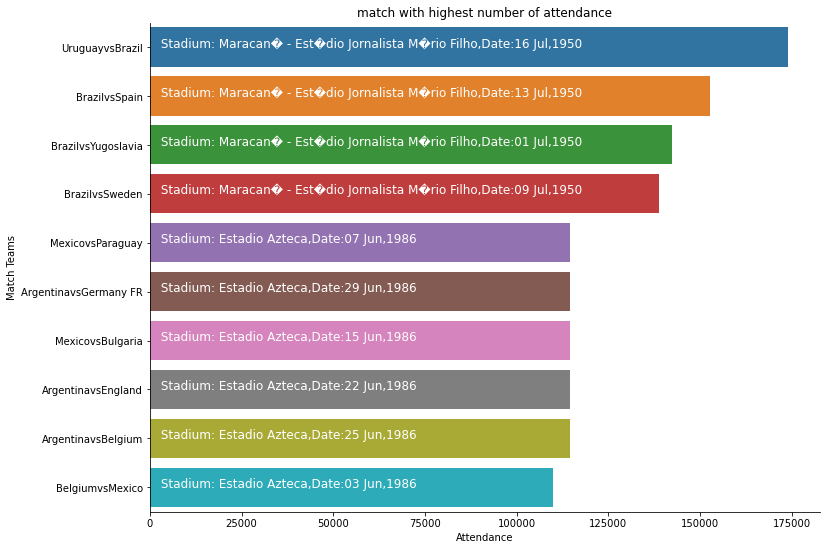

In [106]:
top10['vs']=top10['Home Team Name']+ "vs"+top10['Away Team Name']
plt.figure(figsize=(12,9))

ax=sns.barplot(y=top10['vs'],x=top10['Attendance'])
sns.despine(right=True)
plt.ylabel('Match Teams')
plt.xlabel('Attendance')
plt.title("match with highest number of attendance")
for i,s in enumerate(" Stadium: "+top10['Stadium'] + ",Date:"+top10['Datetime']):
    ax.text(2000,i,s,fontsize=12,color='white')

# Stadium with highest average attendance

In [107]:
matches['Year']=matches['Year'].astype(int)
std=matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by='Attendance',ascending=False)

In [108]:
top10=std[:10]

In [109]:
top10

,Stadium,City,Attendance
99,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,101692.625000
32,Estadio Azteca,Mexico City,100923.684211
137,Rose Bowl,Los Angeles,92600.875000
179,Wembley Stadium,London,86448.222222
151,Soccer City Stadium,Johannesburg,83857.375000
146,Santiago Bernabeu,Madrid,82522.250000
167,Stanford Stadium,San Francisco,81737.333333
159,Stade de France,Saint-Denis,78222.222222
48,Estadio do Maracana,Rio De Janeiro,74197.100000
64,Giants Stadium,New York/New Jersey,73689.714286


Text(0.5, 1.0, 'stadium with highest number of attendance')

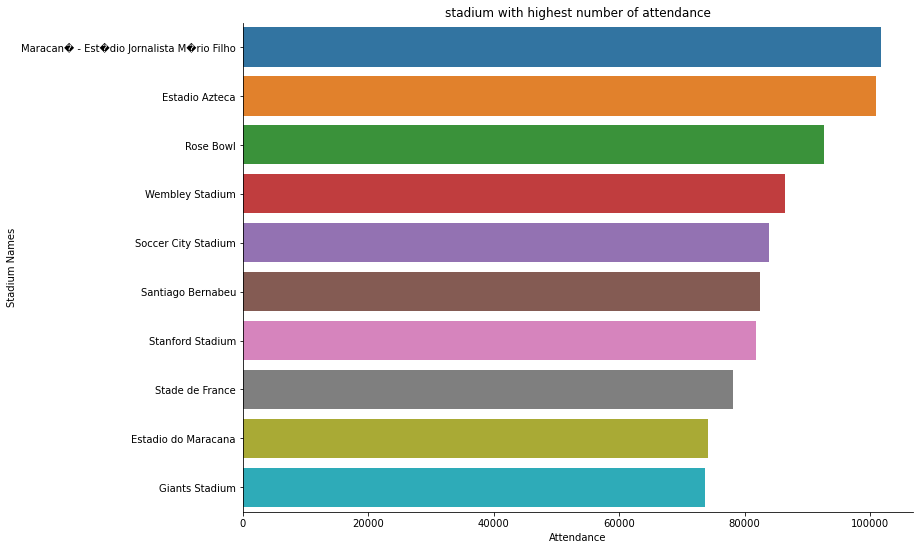

In [110]:
plt.figure(figsize=(12,9))
ax=sns.barplot(y=top10['Stadium'],x=top10['Attendance'])
sns.despine(right=True)
plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('stadium with highest number of attendance')

In [111]:
mac=matches['City'].value_counts()[:20]

In [112]:
mac.iplot(kind='bar')

# Matches Outcome by home and away teams

In [113]:
def get_labels(matches):
    if matches['Home Team Goals']> matches['Away Team Goals']:
        return 'Home Team WIN'
    if matches['Home Team Goals']< matches['Away Team Goals']:
        return 'Away Team WIN'
    return 'DRAWN'

In [114]:
matches['outcomes']=matches.apply(lambda x: get_labels(x),axis=1)

In [115]:
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcomes
0,1930,"13 Jul,1930",Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,Home Team WIN
1,1930,"13 Jul,1930",Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,Home Team WIN
2,1930,"14 Jul,1930",Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Home Team WIN
3,1930,"14 Jul,1930",Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Home Team WIN
4,1930,"15 Jul,1930",Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Home Team WIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,"05 Jul,2014",Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,DRAWN
848,2014,"08 Jul,2014",Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,Away Team WIN
849,2014,"09 Jul,2014",Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,DRAWN
850,2014,"12 Jul,2014",Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,...,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,Away Team WIN


In [116]:
plt.figure(figsize=(6,6))
mt=matches['outcomes'].value_counts()

<Figure size 432x432 with 0 Axes>

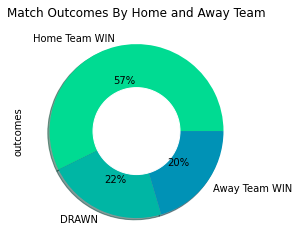

In [117]:
mt.plot.pie(autopct="%1.0f%%",colors=sns.color_palette('winter_r'),shadow=True)
c=plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(c)
plt.title('Match Outcomes By Home and Away Team')
plt.show()